# Case Background & Key Questions	

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of his years’ survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1)  How does health status, represented by average number of days with bad physical health in the past month (PHYSHLTH), differ by state? Also provide an indication of distribution using whatever statistics you find suitable.
 												 								
2)  Digging deeper into the data, what are some factors that impact health (i.e. demographics, behaviors, previous illness, etc.)?	
						 						
To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`. Below you will find a list of steps/questions that you will need to take in your investigation. The first part of the notebook will be focused on cleaning up your data and visualizing it.  The second part of the data set will be focused on performing statistical tests to make statements with statistical significance.  


Before you begin writing your code to clean up this data in Pandas, I necourage you to watch the following video that explains the most efficient way to clean data in pandas.

https://www.youtube.com/watch?v=nxWginnBklU&feature=youtu.be

Also, here is a link to his notebook of sample code.  
https://gitlab.com/cheevahagadog/talks-demos-n-such/tree/master/PyGotham2019

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# pd.read_csv('case_study.csv')

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (171) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [4]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

In [5]:
df['PHYSHLTH'].value_counts()

88.0    21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
99.0      305
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [6]:
pd.set_option('display.max_columns', 360)


In [7]:
# your code here
df[df['_STATE'].isin([9,34,36])]

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,3.0,88.0,2.0,88.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,5.0,6.0,2.0,NaN,NaN,NaN,2.0,1.0,88.0,7.0,1.0,160.0,502.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,101.0,5.0,88.0,2.0,301.0,202.0,305.0,202.0,303.0,306.0,1.0,67.0,203.0,100.0,55.0,201.0,100.0,204.0,1.0,2.0,NaN,2.0,NaN,1.0,42016.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Now check to see how large our subset df.

In [8]:
# your code here
df.shape

(34545, 358)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code.

In [9]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [10]:
#your code here
zero_dict = {88:0, 
            77: np.nan,
            99: np.nan}

df['PHYSHLTH'] = df['PHYSHLTH'].replace(zero_dict)

In [11]:
df.dropna(subset=['PHYSHLTH'], inplace=True)

In [12]:
df['PHYSHLTH'].value_counts()

0.0     21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
20.0      402
14.0      326
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

In [13]:
df.shape

(33747, 358)

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a graph shows the distribution of the data.

In [14]:
# descriptive statistics
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (8).

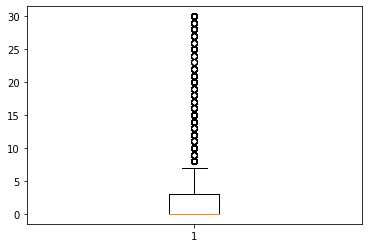

In [15]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot(df['PHYSHLTH'])

# Add x-axis tick labels:
ax.set_xticklabels('PHYSHLTH')

# Add a y-axis label
ax.set_ylabel("Days Sick")

plt.show()

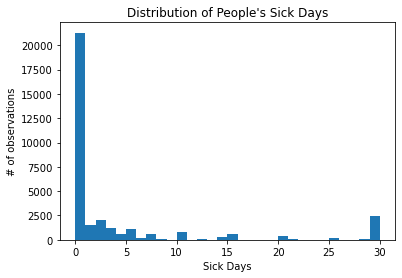

In [16]:
# graphic the distribution of data
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(df['PHYSHLTH'], bins=30)

ax.set_xlabel('Sick Days')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of People's Sick Days")

plt.show()

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [17]:
# code to calculate the average number of sick days by state

df.groupby("_STATE")["PHYSHLTH"].mean()

_STATE
9.0     3.688562
34.0    4.380957
36.0    4.148030
Name: PHYSHLTH, dtype: float64

In [18]:
means = df.groupby('_STATE')['PHYSHLTH'].mean().values
states = ['Conn', 'NJ', 'NY']

/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


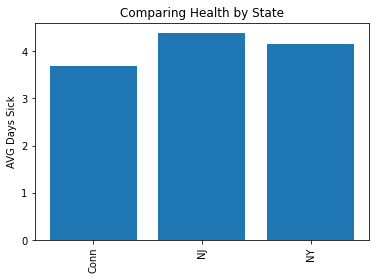

In [19]:
# code to graph those averages using matplotlib
fig, ax = plt.subplots()

# Plot a bar-chart
ax.bar(states, means)

# Set title and lables
ax.set_xticklabels(['Conn', 'NJ', 'NY'], rotation=90)
ax.set_ylabel("AVG Days Sick")
ax.set_title('Comparing Health by State')

plt.show()

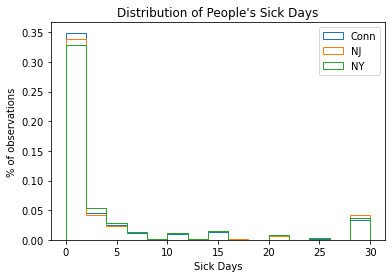

In [20]:
# graphic showing the histogram of data
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(df[df['_STATE']==9]['PHYSHLTH'], bins=15, density=True, histtype='step', label='Conn')
ax.hist(df[df['_STATE']==34]['PHYSHLTH'], bins=15, density=True,histtype='step', label='NJ')
ax.hist(df[df['_STATE']==36]['PHYSHLTH'], bins=15, density=True,histtype='step', label='NY')

# Set labels and title
ax.set_xlabel('Sick Days')
ax.set_ylabel('% of observations')
ax.set_title("Distribution of People's Sick Days")
ax.legend()

plt.show()

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [21]:
def is_Chronic(df):
    if df['PHYSHLTH'] > 10:
        return 1
    else:
        return 0
df['CHRON_SICK'] = df.apply(is_Chronic, axis=1)

In [22]:
# code to create new colum for chronically sick

df['CHRONIC'] = np.where(df['PHYSHLTH']>15, 1, 0)

In [23]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,CHRON_SICK,CHRONIC
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,3.0,0.0,2.0,88.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,5.0,6.0,2.0,NaN,NaN,NaN,2.0,1.0,88.0,7.0,1.0,160.0,502.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,101.0,5.0,88.0,2.0,301.0,202.0,305.0,202.0,303.0,306.0,1.0,67.0,203.0,100.0,55.0,201.0,100.0,204.0,1.0,2.0,NaN,2.0,NaN,1.0,42016.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [24]:
df.groupby('_STATE')['CHRONIC'].mean()

_STATE
9.0     0.086238
34.0    0.108309
36.0    0.095487
Name: CHRONIC, dtype: float64

In [25]:
# code to calculate averages per state
chronic_means = df.groupby('_STATE')['CHRONIC'].mean().values
df.groupby('_STATE')['CHRONIC'].mean()

_STATE
9.0     0.086238
34.0    0.108309
36.0    0.095487
Name: CHRONIC, dtype: float64

/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


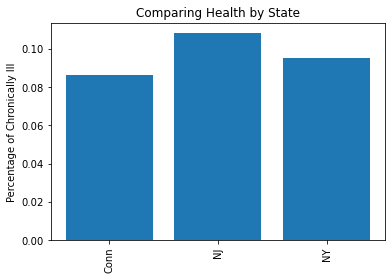

In [26]:
# create graphic to compare chronically sick by state
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.bar(states, chronic_means)

# Set labels and title
ax.set_xticklabels(['Conn', 'NJ', 'NY'], rotation=90)
ax.set_ylabel("Percentage of Chronically Ill")
ax.set_title('Comparing Health by State')

plt.show()

## 6. Independent Variables (categorical)

Does smoking affect the number of days people feel physically ill? 
Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`. When cleaning this data you will find that many respondents were not asked that question. read the codebook to understand why, and use that information when cleaning up your data. I.E, you will need to process two columns in order to create a new column of smokers.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [27]:
# your code here
df.shape

(33747, 360)

In [28]:
df['SMOKDAY2'].value_counts()

3.0    9494
1.0    2611
2.0    1336
9.0      21
7.0       6
Name: SMOKDAY2, dtype: int64

In [29]:
df['SMOKDAY2'].value_counts().sum()

13468

In [30]:
df['smoking'] = np.where(df['SMOKE100']==2, 3, df['SMOKDAY2'])

In [31]:
df['smoking'].value_counts().sum()

32153

In [32]:
df['smoking'] = np.where(df['SMOKE100']==7, 7, df['smoking'])
df['smoking'] = np.where(df['SMOKE100']==9, 9, df['smoking'])

In [33]:
df['smoking'].count()

32359

In [34]:
df['smoking'].describe()

count    32359.000000
mean         2.830217
std          0.700878
min          1.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          9.000000
Name: smoking, dtype: float64

In [35]:
smoking_avg = df['smoking'].value_counts()/df['smoking'].count()
smoking_avg

3.0    0.870824
1.0    0.080689
2.0    0.041287
7.0    0.005161
9.0    0.002040
Name: smoking, dtype: float64

In [36]:
smoking_avg.index

Float64Index([3.0, 1.0, 2.0, 7.0, 9.0], dtype='float64')

/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


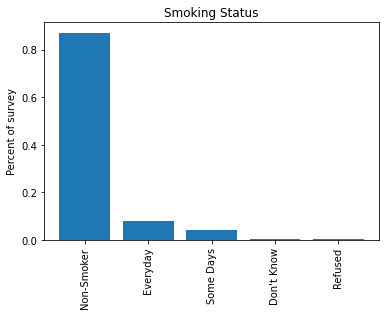

In [37]:
# code to graph those proportion of differen smoking groups using matplotlib
fig, ax = plt.subplots()

# Plot a bar-chart
ax.bar(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"], smoking_avg)

# Set title and lables
ax.set_xticklabels(['Non-Smoker', 'Everyday', 'Some Days',"Don't Know", "Refused"], rotation=90)
ax.set_ylabel("Percent of survey")
ax.set_title('Smoking Status')

plt.show()

In [38]:
df.groupby(['_STATE', 'smoking'])['smoking'].count()

_STATE  smoking
9.0     1.0         706
        2.0         344
        3.0        8870
        7.0          65
        9.0          26
34.0    1.0         901
        2.0         480
        3.0        9595
        7.0          74
        9.0          14
36.0    1.0        1004
        2.0         512
        3.0        9714
        7.0          28
        9.0          26
Name: smoking, dtype: int64

In [39]:
df.groupby(['_STATE', 'smoking']).agg({'smoking': 'count'})

smoking
_STATE smoking         
9.0    1.0          706
       2.0          344
       3.0         8870
       7.0           65
       9.0           26
34.0   1.0          901
       2.0          480
       3.0         9595
       7.0           74
       9.0           14
36.0   1.0         1004
       2.0          512
       3.0         9714
       7.0           28
       9.0           26

In [40]:
state_smoking = df.groupby(['_STATE', 'smoking']).agg({'smoking': 'count'})
# Change: groupby state_office and divide by sum
state_pcts = state_smoking.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))

In [41]:
state_pcts

smoking
_STATE smoking           
9.0    1.0       7.052243
       2.0       3.436220
       3.0      88.602537
       7.0       0.649286
       9.0       0.259714
34.0   1.0       8.143529
       2.0       4.338395
       3.0      86.722704
       7.0       0.668836
       9.0       0.126537
36.0   1.0       8.897554
       2.0       4.537398
       3.0      86.086494
       7.0       0.248139
       9.0       0.230415

In [42]:
state_pcts.unstack()

smoking                                         
smoking       1.0       2.0        3.0       7.0       9.0
_STATE                                                    
9.0      7.052243  3.436220  88.602537  0.649286  0.259714
34.0     8.143529  4.338395  86.722704  0.668836  0.126537
36.0     8.897554  4.537398  86.086494  0.248139  0.230415

<AxesSubplot:xlabel='_STATE'>

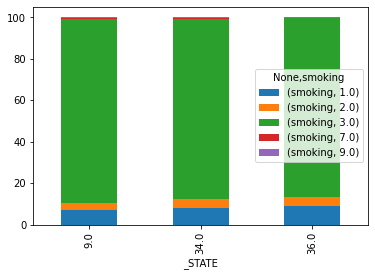

In [43]:
state_pcts.unstack().plot(kind='bar', stacked=True)

In [44]:
# your code here
zero_dict = {3:'non', 
            2: 'some',
            1: 'every',
            7: 'unknown',
            9: 'unknown'}

df['smoking_cat'] = df['smoking'].replace(zero_dict)

In [45]:
df['smoking_cat']

49938         non
49939         non
49940         non
49941         non
49942         non
           ...   
303774      every
303775        non
303776        non
303777    unknown
303778        non
Name: smoking_cat, Length: 33747, dtype: object

In [46]:
state_smoking_cat = df.groupby(['_STATE', 'smoking_cat']).agg({'smoking': 'count'})
# Change: groupby state_office and divide by sum
state_pcts_cat = state_smoking_cat.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
state_pcts_cat.index.set_levels(['Conn', 'NJ', 'NY'], level=0, inplace=True)
state_pcts_cat

smoking
_STATE smoking_cat           
Conn   every         7.052243
       non          88.602537
       some          3.436220
       unknown       0.909000
NJ     every         8.143529
       non          86.722704
       some          4.338395
       unknown       0.795372
NY     every         8.897554
       non          86.086494
       some          4.537398
       unknown       0.478554

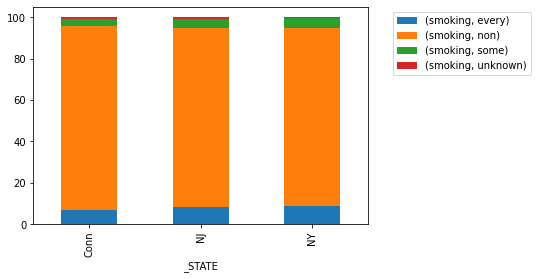

In [47]:
#graph showing the breakdown of smokers per state
ax = state_pcts_cat.unstack().plot(kind='bar', stacked=True)
ax.legend(bbox_to_anchor=(1.5, 1.0))
plt.show()

In [48]:
cat_avg = df.groupby('smoking_cat')['PHYSHLTH'].mean()
cat_std = df.groupby('smoking_cat')['PHYSHLTH'].std()
cat_avg

smoking_cat
every      6.653007
non        3.764435
some       6.295659
unknown    4.081545
Name: PHYSHLTH, dtype: float64

/Users/sandrawelbeck/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


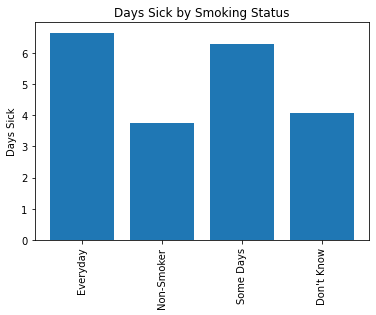

In [49]:
# code to graph these averages sick days for each category of smoking status
fig, ax = plt.subplots()

# Plot a bar-chart
ax.bar(['Every', 'Non', 'Some',"unkonw"], cat_avg)

# Set title and lables
ax.set_xticklabels(['Everyday', 'Non-Smoker',  'Some Days',"Don't Know", "Refused"], rotation=90)
ax.set_ylabel("Days Sick")
ax.set_title('Days Sick by Smoking Status')

plt.show()

## 7. Independent Variables (continuous):

Does the amount of days a person drinks affect the number of days they feel physically ill?
To investigate this, let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [50]:
# code here to clean up the ALCDAY5 responses
alc_dict = {888:0, 
            777: np.nan,
            999: np.nan
            }

df['alcohol'] = df['ALCDAY5'].replace(alc_dict)

In [51]:
df['alcohol']

49938     101.0
49939     230.0
49940       0.0
49941     103.0
49942     101.0
          ...  
303774    203.0
303775      0.0
303776    204.0
303777      NaN
303778    230.0
Name: alcohol, Length: 33747, dtype: float64

In [52]:
# create a function called times100
def calc_monthly(x):
    if x>200:
        return x-200
    elif x>100:
        return min(int((x-100)*4.34524), 30)
    else:
        return x

In [53]:
df['alcohol']= df['alcohol'].apply(calc_monthly)

In [54]:
#descriptive statistics of cleaned data
df['alcohol'].describe()

count    31532.000000
mean         5.437777
std          8.393684
min          0.000000
25%          0.000000
50%          2.000000
75%          7.000000
max         30.000000
Name: alcohol, dtype: float64

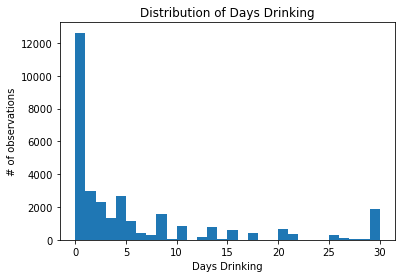

In [55]:
# graphic showing the histogram of data
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(df['alcohol'], bins=30)

ax.set_xlabel('Days Drinking')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of Days Drinking")

plt.show()

In [56]:
# code to calculate averages per state
alcohol_state = df.groupby('_STATE')['alcohol'].mean().values
df.groupby('_STATE')['alcohol'].mean()

_STATE
9.0     6.138136
34.0    5.006094
36.0    5.241650
Name: alcohol, dtype: float64

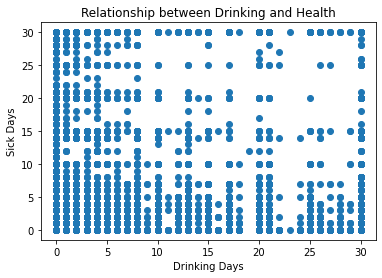

In [57]:
fig, ax = plt.subplots()

# Add data: "height", "weight" as x-y, index as color
ax.scatter(df["alcohol"], df["PHYSHLTH"])

ax.set_xlabel("Drinking Days")
ax.set_ylabel("Sick Days")
ax.set_title('Relationship between Drinking and Health')


plt.show()

In [58]:
# Code to calculate correlation of between number of dirnks of number of days physically ill
df[['PHYSHLTH', 'alcohol']].corr()['PHYSHLTH']

PHYSHLTH    1.000000
alcohol    -0.090125
Name: PHYSHLTH, dtype: float64

## 8. Statistical Inference


- Create a 95% confidence interval for the population mean of physically ill days.

In [59]:
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

In [60]:
mean_ill = 4.085341  #mean chronically ill days
sd = 8.513293        #standard deviation for chronically ill days
n = 33747            #Total number of data points for chronically ill
z = 1.96             #z-score for 95% CI

se = sd /np.sqrt(n)
se

lcb = mean_ill - z* se  #lower limit of the CI
ucb = mean_ill + z* se  #upper limit of the CI
(lcb, ucb)

(3.9945095878333374, 4.176172412166662)

In [61]:
# df.groupby('CHRONIC')['PHYSHLTH'].describe()

In [62]:
# df.groupby('CHRONIC')['PHYSHLTH'].value_counts()

In [63]:
# df.groupby("CHRONIC").agg({"PHYSHLTH": [np.mean, np.std, np.size]})


In [64]:
# mean_ill = 27.980141  #mean chronically ill days (1s)
# sd = 3.826051        #standard deviation for chronically ill days
# n = 3273.0           #Total number of data points for chronically ill
# z = 1.96             #z-score for 95% CI

In [65]:
# se = sd /np.sqrt(n)
# se

In [66]:
# lcb = mean_ill - z* se  #lower limit of the CI
# ucb = mean_ill + z* se  #upper limit of the CI
# (lcb, ucb)

-  Create a 95% confidence interval for the true proportion of chronically sick people.

In [67]:
df.groupby('CHRONIC')['PHYSHLTH'].describe()
# pd.crosstab(df.PHYSHLTH, df.CHRONIC)

,count,mean,std,min,25%,50%,75%,max
CHRONIC,,,,,,,,
0,30474.0,1.518967,3.282874,0.0,0.0,0.0,2.0,15.0
1,3273.0,27.980141,3.826051,16.0,29.0,30.0,30.0,30.0


In [68]:
n = 3273.0+30474.0
proportion_chron = 3273.0/(n)
proportion_chron

0.09698639879100364

In [69]:
se_sick = np.sqrt(proportion_chron * (1 - proportion_chron)/ n)
se_sick

0.0016109608158998332

In [70]:
z_score = 1.96
lci = proportion_chron - z_score* se_sick #lower limit of the CI
uci = proportion_chron + z_score* se_sick #upper limit of the CI
(lci,uci)

(0.09382891559183996, 0.10014388199016731)

In [71]:
import statsmodels.api as sm
sm.stats.proportion_confint(n * proportion_chron, n)

(0.0938289736113347, 0.10014382397067258)

In [72]:
# pd.crosstab(df.CHRONIC, df.PHYSHLTH)

In [73]:
# df.groupby('CHRONIC')['PHYSHLTH'].get_group(1).describe()

In [74]:
# df.groupby(['CHRONIC', 'PHYSHLTH']).agg({'PHYSHLTH': 'count'})

In [75]:
# df[['PHYSHLTH', 'CHRONIC']].describe()

## 9. Hypothesis Tests 

**For the following questions that require hypothesis tests, you must complete the following:**

*1. Write down the null and alternative hypothesis you are testing.* 

*2. Select the appropriate test and calculate the test statistic and P-values.*

*3. Determine the critical value for the 95% confidence interval.*

*4. Evaluate the test statistic against the critical value.*

*5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.*  

### The following questions are regarding the `PHYSHLTH` variable. 
- What is the probability of getting this sample mean for days physically ill, if the population mean is 4?
- Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?
- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states. 


#### Probability of getting this sample mean if population mean is 4

$H_{0}: \mu = \bar{x}\$

$H_{a}: \mu \neq \bar{x}$

In [76]:
df.PHYSHLTH.describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

In [77]:
import math
num = 4.085341 - 4
denom = 8.513293/(math.sqrt(33747))
t = num/denom
t

1.8415254812188389

In [78]:
degf = 33747 - 1
tval = 1.96

In [79]:
#One sample t-test (two-tailed)
import scipy.stats as stats
data = df['PHYSHLTH']
stats.ttest_1samp(a=data, popmean=4)

#fail to reject null hypothesis

Ttest_1sampResult(statistic=1.8415238127150806, pvalue=0.06555360487569364)

#### Statistical significance between men and women days ill

$H_{0}: \mu_{women} = \mu_{men}$ \
$H_{a}: \mu_{women} \neq \mu_{men}$

In [80]:
df.SEX.value_counts()

2.0    18911
1.0    14818
9.0       18
Name: SEX, dtype: int64

In [81]:
repl_sex = {1:'Male', 
            2: 'Female',
            9: np.nan}

df['SEX'] = df['SEX'].replace(repl_sex)

In [82]:
df.SEX.value_counts()

Female    18911
Male      14818
Name: SEX, dtype: int64

In [83]:
# df.dropna(subset=['SEX'], inplace=True)

In [84]:
df.groupby('SEX')['PHYSHLTH'].describe()

,count,mean,std,min,25%,50%,75%,max
SEX,,,,,,,,
Female,18911.0,4.385278,8.715034,0.0,0.0,0.0,3.0,30.0
Male,14818.0,3.700972,8.230261,0.0,0.0,0.0,2.0,30.0


In [85]:
df.groupby('SEX')['PHYSHLTH'].get_group('Female').describe()

count    18911.000000
mean         4.385278
std          8.715034
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

In [86]:
df.groupby('SEX')['PHYSHLTH'].get_group('Male').describe()

count    14818.000000
mean         3.700972
std          8.230261
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

In [87]:
fem = df.groupby('SEX')['PHYSHLTH'].get_group('Female')
mal = df.groupby('SEX')['PHYSHLTH'].get_group('Male')

In [99]:
mal

49939     0.0
49945     0.0
49951     0.0
49953     2.0
49954     0.0
         ... 
303771    0.0
303772    0.0
303774    0.0
303776    6.0
303778    0.0
Name: PHYSHLTH, Length: 14818, dtype: float64

In [89]:
#two sample t-test (two tailed)
from scipy.stats import t
def independent_ttest(data1, data2, alpha):
# calculate means
    mean1, mean2 = np.mean(data1), np.mean(data2)
# calculate standard errors
    std1, std2 = np.std(data1, ddof=1), np.std(data2, ddof=1)
    n1, n2 = len(data1), len(data2)
    se1, se2 = std1/math.sqrt(n1), std2/math.sqrt(n2)
# standard error on the difference between the samples
    sed = math.sqrt(se1**2.0 + se2**2.0)
# calculate the t statistic
    t_stat = (mean1 - mean2) / sed
# degrees of freedom
    df = len(data1) + len(data2) - 2
# calculate the critical value
    alpha = 0.05
    cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
    return t_stat, df, cv, p

independent_ttest(fem,mal,0.05)

(7.384412969212338, 33727, 1.6448988077044957, 1.5654144647214707e-13)

In [90]:
stats.ttest_ind_from_stats(mean1=4.385278, std1=8.715034, nobs1=18911, 
                           mean2=3.700972, std2=8.230261, nobs2=14818,equal_var=True)

Ttest_indResult(statistic=7.333351972070597, pvalue=2.295063771266579e-13)

In [91]:
# numer = 3.700972 - 4.385278
# numer

In [92]:
# denom2 = math.sqrt((((8.230261)*2)/14818) + (((8.715034)*2)/18911))
# denom2

In [93]:
# t = numer/denom2
# t

#### Statistically significant difference in physical health of people from the three states

### The following questions are regarding the  `CHRONIC` variable.
- What is the probability of drawing this sample proportion if chronically true population proportion is 0.10?
- Is there a statistically significant difference in the percentage of men and women who are chronically sick?
- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states.

$H_{0}: p_{pop} = .10\$

$H_{a}: p_{pop} \neq .10$

In [94]:
df.groupby('CHRONIC')["CHRONIC"].describe()

,count,mean,std,min,25%,50%,75%,max
CHRONIC,,,,,,,,
0,30474.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3273.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [95]:
df.CHRONIC.value_counts()

0    30474
1     3273
Name: CHRONIC, dtype: int64

In [96]:
#one sample z-test...two-tailed(I think)
n = (3273+30474)
p_hat = 3273/n
prop_num = p_hat - .10
prop_denom = math.sqrt((.1*.9)/n)
z = prop_num/prop_denom
z

#reject null hypothesis

-1.8453642909100378

In [97]:
p_hat

0.09698639879100364

In [98]:
from statsmodels.stats.proportion import proportions_ztest
statsmodels.stats.proportion.proportions_ztest(3273, n, value=.10, alternative='two-sided', prop_var=p_hat)

NameError: name 'statsmodels' is not defined

#### Statistical difference between men and women for chronic illness

In [ ]:
df.groupby('SEX')['CHRONIC'].describe()

In [ ]:
df.groupby('SEX')['CHRONIC'].get_group('Male').describe()

In [ ]:
fem_chron = df.groupby('SEX')['CHRONIC'].get_group('Female')
mal_chron = df.groupby('SEX')['CHRONIC'].get_group('Male')

# 10. Independent Investigation

Now that you have invesitgated physical health and chronic sickness and their relationships with states and gender, you will conduct a similar investigation with variables of your choosing. 

Select a continuous dependent varaible and a binary dependent variable that you would like to investigate. Then select a categorical independent variable with at least 3 groups and for which you will test to see if the response to the independent variable affects outcomes of the dependent variable.

continuous dependent variable = _INCOMG \
binary dependent variable = EXERANY2 (physical activity) \
categorical independent variable = _EDUCAG (Education Level)


For your continuous dependent variable perform the following:
  - Determine the sample mean and sample standard deviation
  - Create a confidence interval for a population mean.
  - Perform a two-sample test of means for gender.
  - Perform a one-way ANOVA using your categorical independent variable.

In [ ]:
df['_INCOMG'].value_counts()
zero_dict = {9: np.nan}

df['_INCOMG'] = df['_INCOMG'].replace(zero_dict)
df.dropna(subset=["_INCOMG"], inplace=True)

In [ ]:
df['_INCOMG'].describe()

In [ ]:
mean_income = 3.917056  #mean chronically ill days
sd = 1.418878        #standard deviation for chronically ill days
n = 28067            #Total number of data points for chronically ill
z = 1.96             #z-score for 95% CI

se = sd /np.sqrt(n)
se

lcb = mean_income - z* se  #lower limit of the CI
ucb = mean_income + z* se  #upper limit of the CI
(lcb, ucb)

In [ ]:
fem_inc = df.groupby('SEX')['_INCOMG'].get_group('Female')
mal_inc = df.groupby('SEX')['_INCOMG'].get_group('Male')
df.groupby('SEX')['_INCOMG'].describe()

In [ ]:
stats.ttest_ind_from_stats(mean1=3.818915, std1=1.451851, nobs1=15385, 
                           mean2=4.036543, std2=1.368548, nobs2=12670.0,equal_var=True)

In [ ]:
df['_EDUCAG'].value_counts()

In [ ]:
df['_EDUCAG'].value_counts()
zero_dict = {9: np.nan}

df['_EDUCAG'] = df['_EDUCAG'].replace(zero_dict)
df.dropna(subset=["_EDUCAG"], inplace=True)

In [ ]:
scipy.stats.f_oneway(df['_INCOMG'],df['_EDUCAG'])

Select/create a binary variable from the survey questions as your dependent variable and perform the following:
  - Create a confidence interval for a population proportion.
  - Perform a two proportions z-test using gender.
  - Perform a Chi-Square test using your categorical independent variable.

In [ ]:
df['EXERANY2'].value_counts()

In [ ]:
df['EXERANY2'].value_counts()
zero_dict = {9: np.nan,
             7: np.nan}

df['EXERANY2'] = df['EXERANY2'].replace(zero_dict)
df.dropna(subset=['EXERANY2'], inplace=True)

In [ ]:
zero_dict = {'Yes': 1,
             'No': 0}
df['EXERANY2'] = df['EXERANY2'].replace(zero_dict)

In [ ]:
df['EXERANY2'].describe()

In [ ]:
# pd.crosstab(df.CHRONIC, df.PHYSHLTH)
df.groupby('EXERANY2')["EXERANY2"].describe()

In [ ]:
n = (19413+6706)
p_hat = 19413/n
exer_num = p_hat*(1-p_hat)
exer_denom = n
something = math.sqrt(exer_num/exer_denom)
z = 1.96
lower = p_hat - z * something
upper = p_hat + z * something

(lower,upper)

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
statsmodels.stats.proportion.proportions_ztest(3273, n, value=.10, alternative='two-sided', prop_var=p_hat)